In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
##feature Scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge,Lasso,ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

In [54]:
data = pd.read_csv("F:\ML_Projects\Predict_Health_Insurance_Premium\\notebooks\data_preprocessed.csv")

In [55]:
data.dtypes

Unnamed: 0      int64
age             int64
sex            object
bmi           float64
children       object
smoker         object
region         object
expenses      float64
dtype: object

In [56]:
train_data,test_data=train_test_split(data,test_size=0.3)

In [57]:
target_column_name = 'expenses'
drop_columns = [target_column_name,'Unnamed: 0']

In [58]:
input_feature_train_df = train_data.drop(columns=drop_columns,axis=1)
target_feature_train_df=train_data[target_column_name]
            
            
input_feature_test_df=test_data.drop(columns=drop_columns,axis=1)
target_feature_test_df=test_data[target_column_name]

In [59]:
input_feature_train_df.head()

,age,sex,bmi,children,smoker,region
705,51,female,38.1,yes,yes,southeast
693,27,female,34.8,yes,no,southwest
1069,37,male,37.1,yes,yes,southeast
938,53,male,29.5,yes,no,southeast
1118,30,female,20.0,no,no,northwest


In [60]:
cat_cols = input_feature_train_df.select_dtypes(include=['object']).columns.tolist()
num_cols = input_feature_train_df.select_dtypes(include=['int','float']).columns.tolist()

In [61]:
cat_cols

['sex', 'children', 'smoker', 'region']

In [62]:
num_cols

['age', 'bmi']

In [63]:
## Numerical Pipeline
num_pipeline=Pipeline(
    steps=[
    ('scaler',StandardScaler())
    ]
)

In [68]:
## categorical Pipeline
cat_pipeline=Pipeline(
    steps=[
        ('onehot',OneHotEncoder(drop='first')),
        ('scaler',StandardScaler(with_mean=False))
    ]
)

In [69]:
preprocessor=ColumnTransformer([
            ('num_pipeline',num_pipeline,num_cols),
            ('cat_pipeline',cat_pipeline,cat_cols)
            ])

In [70]:
input_feature_train_df

,age,sex,bmi,children,smoker,region
705,51,female,38.1,yes,yes,southeast
693,27,female,34.8,yes,no,southwest
1069,37,male,37.1,yes,yes,southeast
938,53,male,29.5,yes,no,southeast
1118,30,female,20.0,no,no,northwest
...,...,...,...,...,...,...
922,34,male,35.8,yes,no,northwest
625,36,male,28.9,no,no,northeast
939,18,male,23.2,yes,no,southeast
544,54,male,30.2,yes,no,northwest


In [71]:
input_feature_train_arr=preprocessor.fit_transform(input_feature_train_df)
input_feature_test_arr=preprocessor.transform(input_feature_test_df)

In [72]:
train_arr = np.c_[input_feature_train_arr, np.array(target_feature_train_df)]
test_arr = np.c_[input_feature_test_arr, np.array(target_feature_test_df)]

In [73]:
 x_train, y_train, x_test, y_test = (
                train_arr[:,:-1],
                train_arr[:,-1],
                test_arr[:,:-1],
                test_arr[:,-1]
            )

In [74]:
RMSE={}
R2_Score={}
Trained_Model={}

In [75]:
def model_perf_plot(y_train,y_train_pred,y_test,y_test_pred):
    f, axes = plt.subplots(1, 2, figsize=(15, 5),sharey=True)
    axes[0].scatter(x=y_train_pred, y=y_train,c='y')
    axes[0].set_title('Actual vs Predicted Plot for Training data')
    axes[0].grid()
    axes[0].set_xlabel("predicted values")
    axes[0].set_ylabel("actual values")
  
    axes[1].scatter(x=y_test_pred, y=y_test,c='g')
    axes[1].set_title('Actual vs Predicted Plot for Test data')
    axes[1].grid()
    axes[1].set_xlabel("predicted values")
    axes[1].set_ylabel("actual values")
    
    plt.subplots_adjust(wspace=0.50, hspace=0.1)
    plt.show()

In [76]:
def evaluate_model(X_train, y_train,X_test,y_test,model,param):
    gs = GridSearchCV(model,param,cv=5)
    gs.fit(X_train,y_train)
    model.set_params(**gs.best_params_)
    model.fit(X_train,y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    rmse_train = mean_squared_error(y_train,y_train_pred,squared=False)
    rmse_test = mean_squared_error(y_test,y_test_pred,squared=False)
    r2_score_train = r2_score(y_train,y_train_pred)
    r2_score_test = r2_score(y_test,y_test_pred)
    return model ,y_train_pred, y_test_pred, rmse_train, rmse_test,r2_score_train,r2_score_test

Ridge Regression

RMSE  with Ridge(alpha=2) on train data is 5144.940114637195
RMSE  with Ridge(alpha=2) on test data is 5095.799853994528
R square  with Ridge(alpha=2) on train data is 0.7329860815823859
R square  with Ridge(alpha=2) on test data is 0.768132764412817


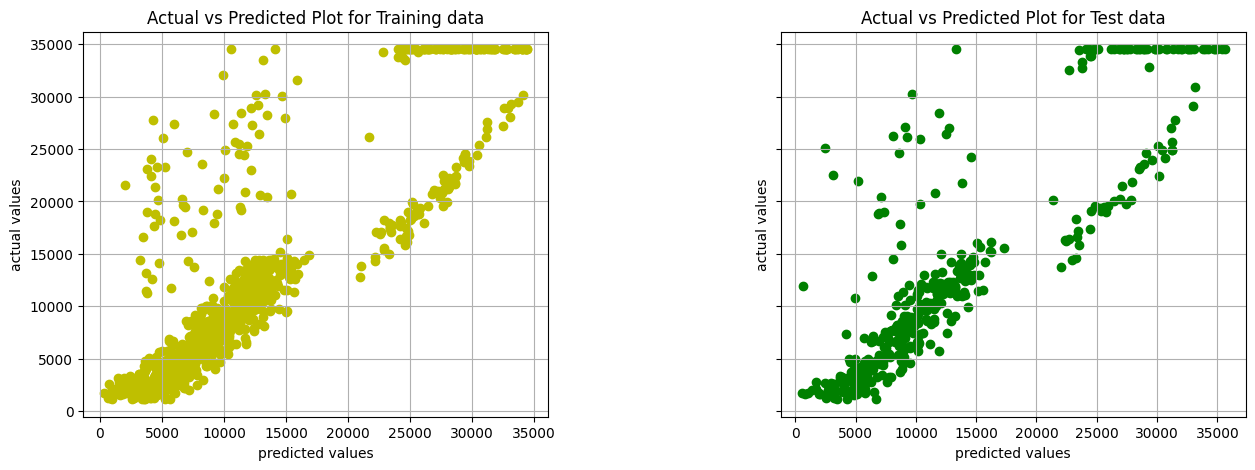

In [78]:
model  = Ridge()
param =  {'alpha': [0.1,0.5,1,1.5,2]}
model ,y_train_pred, y_test_pred, rmse_train, rmse_test,r2_score_train,r2_score_test = evaluate_model(x_train, y_train,x_test,y_test,model,param)

RMSE[model] = rmse_test
R2_Score[model] = r2_score_test

print(f'RMSE  with {model} on train data is {rmse_train}')
print(f'RMSE  with {model} on test data is {rmse_test}')
print(f'R square  with {model} on train data is {r2_score_train}')
print(f'R square  with {model} on test data is {r2_score_test}')

model_perf_plot(y_train,y_train_pred,y_test,y_test_pred)

residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred

#check_normality_residuals(residuals_train,residuals_test)

### Lasso Regression

RMSE  with Lasso(alpha=0.1) on train data is 5144.905802717058
RMSE  with Lasso(alpha=0.1) on test data is 5095.374674479346
R square  with Lasso(alpha=0.1) on train data is 0.7329896430347993
R square  with Lasso(alpha=0.1) on test data is 0.7681714555265966


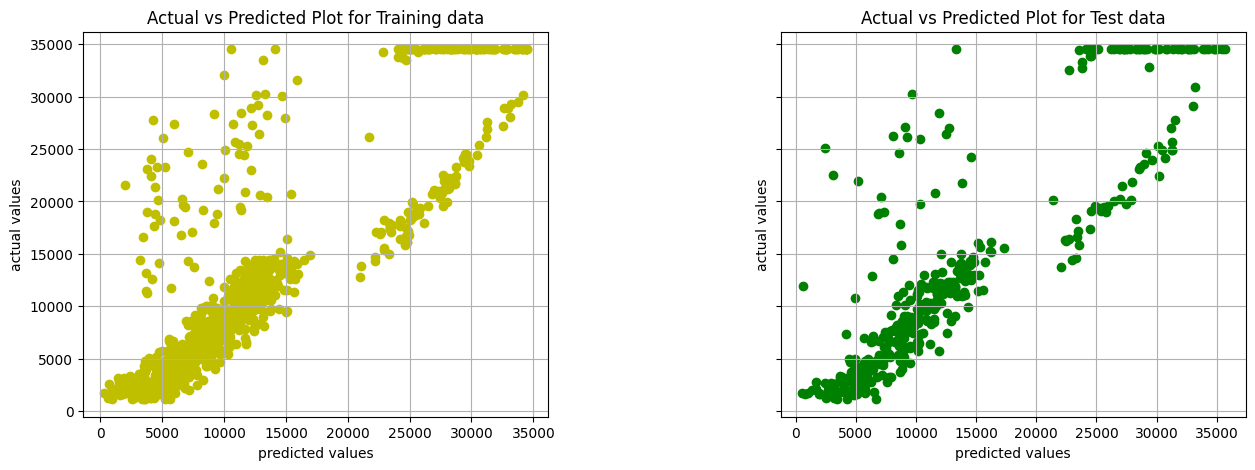

In [79]:
model  = Lasso()
param =  {'alpha': [0.1,0.5,1,1.5,2]}

model ,y_train_pred, y_test_pred, rmse_train, rmse_test,r2_score_train,r2_score_test = evaluate_model(x_train, y_train,x_test,y_test,model,param)

RMSE[model] = rmse_test
R2_Score[model] = r2_score_test

print(f'RMSE  with {model} on train data is {rmse_train}')
print(f'RMSE  with {model} on test data is {rmse_test}')
print(f'R square  with {model} on train data is {r2_score_train}')
print(f'R square  with {model} on test data is {r2_score_test}')

model_perf_plot(y_train,y_train_pred,y_test,y_test_pred)

### Decision Tree Regression

RMSE  with DecisionTreeRegressor(max_depth=6, max_features='log2', min_samples_split=10) on train data is 4585.517313086469
RMSE  with DecisionTreeRegressor(max_depth=6, max_features='log2', min_samples_split=10) on test data is 5292.4690304887645
R square  with DecisionTreeRegressor(max_depth=6, max_features='log2', min_samples_split=10) on train data is 0.7878954783524452
R square  with DecisionTreeRegressor(max_depth=6, max_features='log2', min_samples_split=10) on test data is 0.7498898533196892


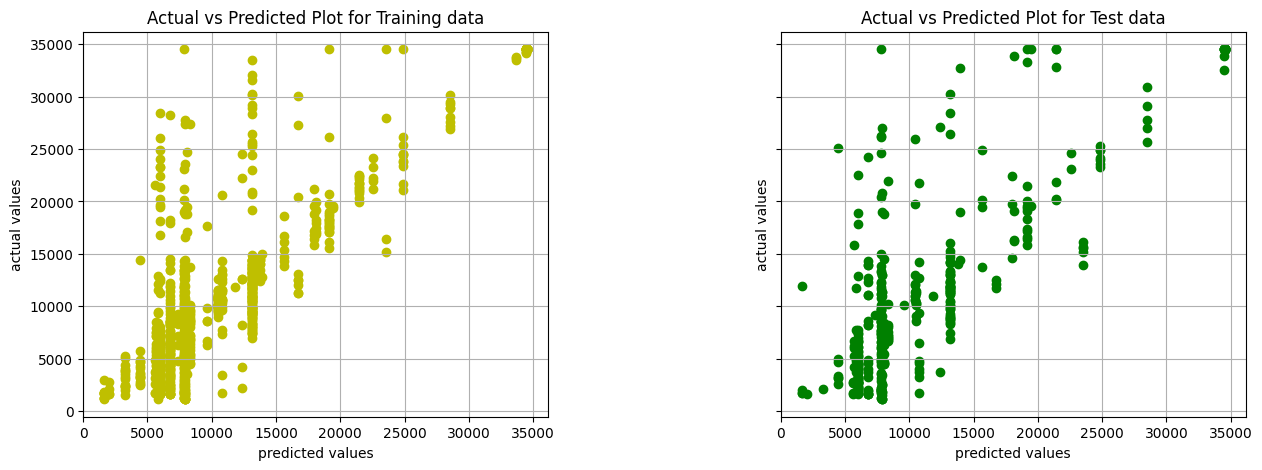

In [83]:
from sklearn.tree import DecisionTreeRegressor
model  = DecisionTreeRegressor()

param =  {'max_features': ["sqrt", "log2"],
           'max_depth' : [4,6,8,9,10,12],
           'min_samples_split' : [2,4,6,8,10]}
model ,y_train_pred, y_test_pred, rmse_train, rmse_test,r2_score_train,r2_score_test = evaluate_model(x_train, y_train,x_test,y_test,model,param)

RMSE[model] = rmse_test
R2_Score[model] = r2_score_test

print(f'RMSE  with {model} on train data is {rmse_train}')
print(f'RMSE  with {model} on test data is {rmse_test}')
print(f'R square  with {model} on train data is {r2_score_train}')
print(f'R square  with {model} on test data is {r2_score_test}')

model_perf_plot(y_train,y_train_pred,y_test,y_test_pred)

### RandomForest Regression

RMSE  with RandomForestRegressor(max_depth=4, min_samples_leaf=3, n_estimators=10) on train data is 4197.336227742929
RMSE  with RandomForestRegressor(max_depth=4, min_samples_leaf=3, n_estimators=10) on test data is 4396.663794465582
R square  with RandomForestRegressor(max_depth=4, min_samples_leaf=3, n_estimators=10) on train data is 0.8222863562777512
R square  with RandomForestRegressor(max_depth=4, min_samples_leaf=3, n_estimators=10) on test data is 0.827391899063641


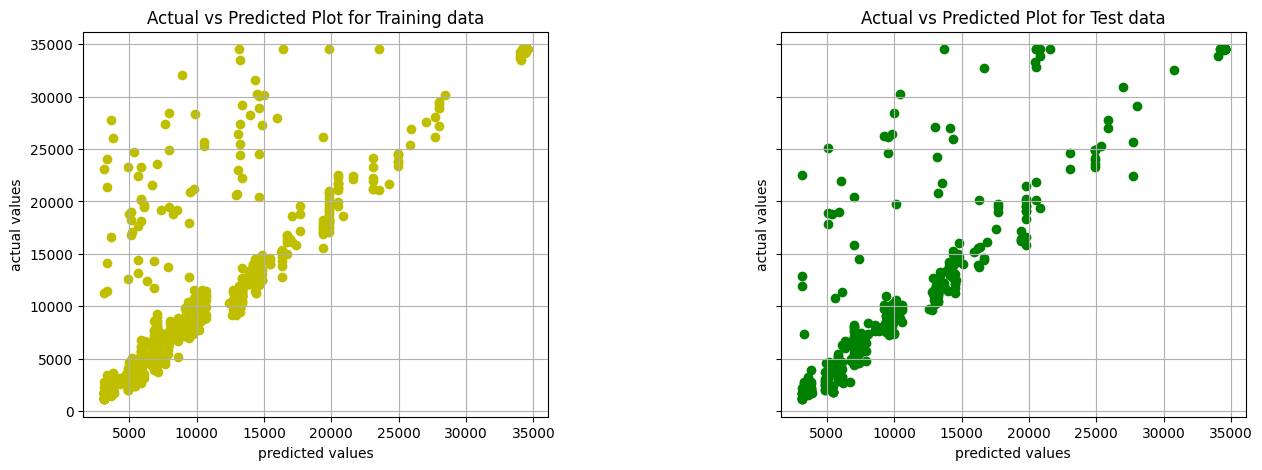

In [84]:
from sklearn.ensemble import RandomForestRegressor
#from sklearn.tree import DecisionTreeRegressor
model  = RandomForestRegressor()
param =  {'n_estimators': [10,20,30,40,50],
           'max_depth' : [4,6,8,9,10,12],
           'min_samples_split' : [2,4,6,8],
            'min_samples_leaf' :[ 1,3,5,7]}
model ,y_train_pred, y_test_pred, rmse_train, rmse_test,r2_score_train,r2_score_test = evaluate_model(x_train, y_train,x_test,y_test,model,param)

RMSE[model] = rmse_test
R2_Score[model] = r2_score_test

print(f'RMSE  with {model} on train data is {rmse_train}')
print(f'RMSE  with {model} on test data is {rmse_test}')
print(f'R square  with {model} on train data is {r2_score_train}')
print(f'R square  with {model} on test data is {r2_score_test}')

model_perf_plot(y_train,y_train_pred,y_test,y_test_pred)

### GradientBoost Regressor

RMSE  with GradientBoostingRegressor(learning_rate=0.05) on train data is 3992.6130737304675
RMSE  with GradientBoostingRegressor(learning_rate=0.05) on test data is 4376.189281575567
R square  with GradientBoostingRegressor(learning_rate=0.05) on train data is 0.8391993866592857
R square  with GradientBoostingRegressor(learning_rate=0.05) on test data is 0.8289957688064465


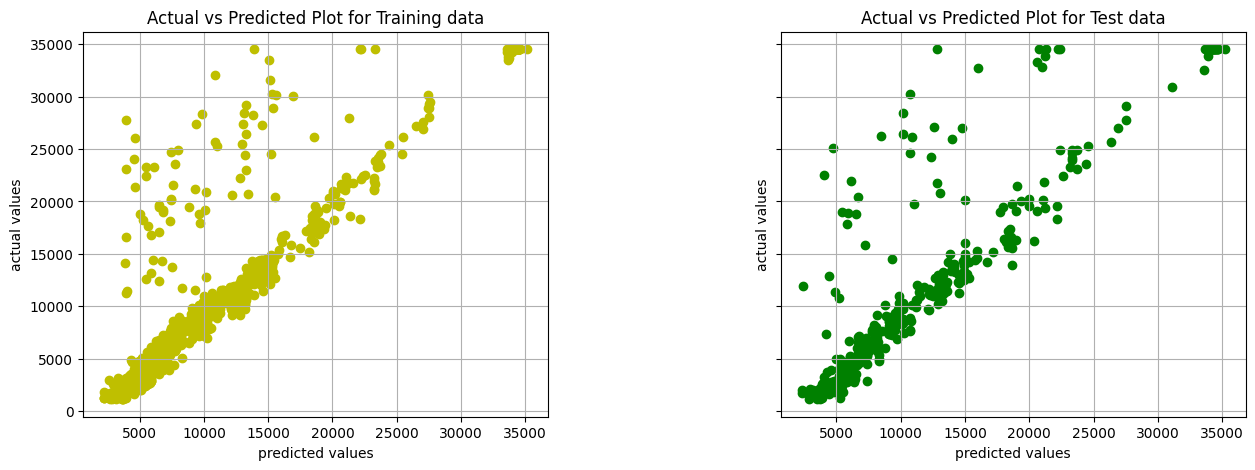

In [85]:
from sklearn.ensemble import GradientBoostingRegressor
model  = GradientBoostingRegressor()

param =  {'n_estimators': [10,20,30,50,100],
           'learning_rate' : [0.01,0.05,0.1,0.5,1]}
    
model ,y_train_pred, y_test_pred, rmse_train, rmse_test,r2_score_train,r2_score_test = evaluate_model(x_train, y_train,x_test,y_test,model,param)

RMSE[model] = rmse_test
R2_Score[model] = r2_score_test

print(f'RMSE  with {model} on train data is {rmse_train}')
print(f'RMSE  with {model} on test data is {rmse_test}')
print(f'R square  with {model} on train data is {r2_score_train}')
print(f'R square  with {model} on test data is {r2_score_test}')

model_perf_plot(y_train,y_train_pred,y_test,y_test_pred)